In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

In [7]:
data = pd.read_csv("student_dataset.csv")

In [8]:
# Separate the features and the target variable
features = data.drop('Label', axis=1)
target = data['Label']

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [10]:
# Initialize and train a Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [11]:
# Predict the labels for the test set
y_pred = clf.predict(X_test)

In [12]:
# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


---
The dataset consists of features like Grades, Attendance, and Study Hours, with Label being the target variable.

A Decision Tree classifier is trained on the dataset. Decision Trees are good at handling data that involves clear rules or thresholds.

The accuracy on the test set is calculated, which turns out to be **100%**. This unusually high accuracy needs a check for underlying issues like overfitting or data leakage.





Why 100% Accuracy Isn't Good Here?

Although 100% accuracy might seem ideal, here it indicates a problem. It means our model isn't really learning from diverse features and won't perform well if we try to use it in real-world scenarios where it needs to make predictions based on more than just grades.

**Overfitting**

Overfitting happens when a model learns the details and noise in the training data to an extent that it negatively impacts the performance of the model on new data. It means the model is too complex for the amount of training data or features provided, capturing noise as if it were signal.

**Data Leakage**

Data leakage occurs when information that would not be available at prediction time is used during training.

In our case, data leakage happens because the Label (our prediction target) is directly based on Grades. This means the label is not something that naturally occurs but is instead calculated from the grades. When a feature in the dataset dictates the target, the model doesn't have to learn anything complex; it just applies the rule.

If Label is derived directly from Grades in such a way that specific thresholds on grades determine the label without ambiguity, its a clear case of data leakage. This is not about the model memorizing the data, but rather having access to information that makes learning the target trivial.

---

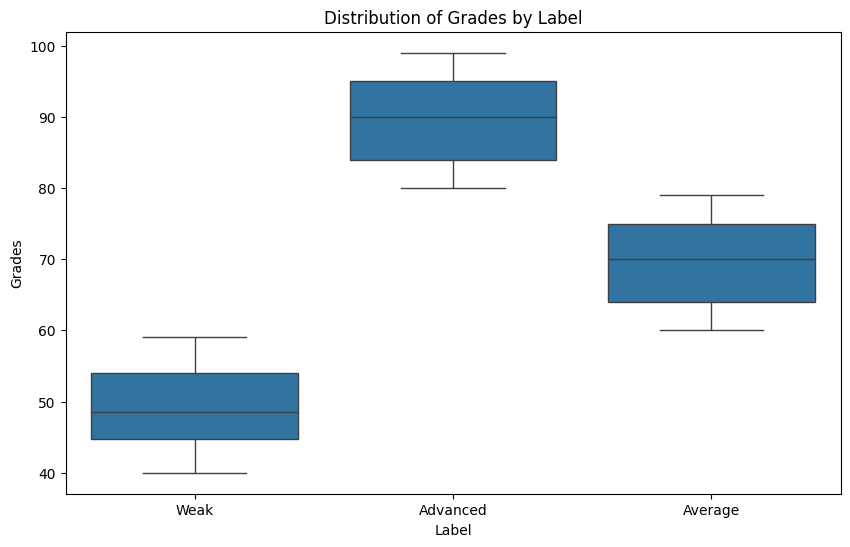

In [14]:
# Visualizing the relationship between Grades and Labels to detect data leakage
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the Grades against Labels
plt.figure(figsize=(10, 6))
sns.boxplot(x='Label', y='Grades', data=data)
plt.title('Distribution of Grades by Label')
plt.show()


As the boxplot shows, each label corresponds to a distinct range of grades. This suggests that the labels are directly derived from the grades, leading to perfect predictability for the model.

The feature importance showed that only the Grades feature was used by the model to perfectly predict the outcome, with other features like Attendance and Study Hours not contributing at all. This suggests that Grades directly determines the Label, which is a clear sign of data leakage.

Even when I made the Decision Tree simpler by limiting its depth, the accuracy on the test set stayed at 100%. Usually, overfitting means the model does really well on training data but not as well on test data. If overfitting was the issue, making the model less complex would usually drop the accuracy.

When I looked at the boxplot that shows how Grades spread out across different Label categories, I saw distinct and non-overlapping ranges for each category. This is a classic sign of data leakage, where the target variable (Label) can be perfectly predicted just from the Grades.